In [1]:
# Set up Notebook
%matplotlib inline

# Importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Orange_Telecom_Churn_Data dataset
df = pd.read_csv("Orange_Telecom_Churn_Data.csv")

# Dimension of data
df.shape

(5000, 21)

In [3]:
# Getting top 10-rows 
df.head(10)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Check data type of each feature and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [4]:
# Removing columns not needed in the dataset

df = df.drop(columns = ["state", "area_code", "phone_number", "number_vmail_messages"])
print(df.shape)
df.head()

(5000, 17)


,account_length,intl_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# displays summary statistics for the dataframe
df.describe()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Define mapping dictionary to encode categorical variables
churned_mapping_dict = {False : 0, True : 1}
mapping_dict = {"no" : 0, "yes" : 1}

# Encode categorical columns
df["target"] = df.churned.map(churned_mapping_dict)
df["intl_plan_cat"] =  df.intl_plan.map(mapping_dict)
df["voice_mail_plan_cat"] =  df.voice_mail_plan.map(mapping_dict)

print(df.shape)
print(" ")

# Drop categorical columns
df = df.drop(columns = ["churned", "intl_plan", "voice_mail_plan"])
print(df.shape)
df.head()

(5000, 20)
 
(5000, 17)


,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target,intl_plan_cat,voice_mail_plan_cat
0,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [7]:
# To check if there is class imbalance

df.target.value_counts()

0    4293
1     707
Name: target, dtype: int64

In [8]:
# Creating dependent and independent variable
X = df.drop(columns = ["target"])
y = df["target"]

In [9]:
# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine learning method.
def confusion(test, predict, labels, title='Confusion Matrix'):
    '''
        test: true label of test data, must be one dimensional
        predict: predicted label of test data, must be one dimensional
        labels: list of label names, ie: ['positive', 'negative']
        title: plot title
    '''

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")    
    hm.axes.set_title(title, fontsize=20)
    hm.axes.set_xlabel('Predicted', fontsize=18)
    hm.axes.set_ylabel('Actual', fontsize=18)

    return None

In [11]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

churned_model_lr = LogisticRegression(C=1E6)
churned_model_lr = churned_model_lr.fit(X_train, y_train)

# Use model to predict test data
predicted_lr = churned_model_lr.predict(X_test)

Logistic Regression [Churned Data] Score = 67.3%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       306
           1       0.68      0.64      0.66       297

    accuracy                           0.67       603
   macro avg       0.67      0.67      0.67       603
weighted avg       0.67      0.67      0.67       603



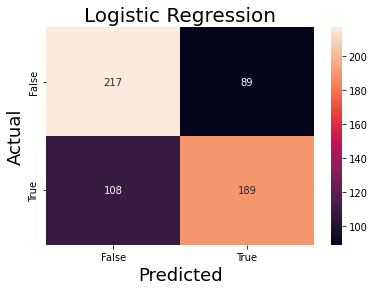

In [63]:
# Model Evaluation
score = 100.0 * metrics.accuracy_score(y_test, predicted_lr)
print(f'Logistic Regression [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_lr))

confusion(y_test, predicted_lr, ['False', 'True'], title='Logistic Regression')

# Grab positive class probability
y_score_churned_model_lr = churned_model_lr.decision_function(X_test)

# Compute ROC curve and ROC area
fpr_churned_model_lr, tpr_churned_model_lr, thresholds = roc_curve(y_test, y_score_churned_model_lr)
roc_auc_churned_model_lr = auc(fpr_churned_model_lr, tpr_churned_model_lr)


Random Forest Classifier [Churned Data] Score = 86.4%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       306
           1       0.92      0.79      0.85       297

    accuracy                           0.86       603
   macro avg       0.87      0.86      0.86       603
weighted avg       0.87      0.86      0.86       603



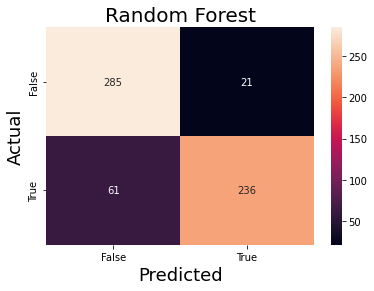

In [64]:
# Create and fit classifier
churned_model_rf = RandomForestClassifier(n_estimators=10, random_state=0)
churned_model_rf = churned_model_rf.fit(X_train, y_train)

# Classify test data and display score and report
predicted_rf = churned_model_rf.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_rf)
print(f'Random Forest Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_rf))

confusion(y_test, predicted_rf, ['False', 'True'], title='Random Forest')

# Grab positive class probability
y_score_churned_model_rf = churned_model_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_churned_model_rf, tpr_churned_model_rf, thresholds = roc_curve(y_test, y_score_churned_model_rf)
roc_auc_churned_model_rf = auc(fpr_churned_model_rf, tpr_churned_model_rf)

Support Vector Machine Classifier [Churned Data] Score = 50.9%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       306
           1       1.00      0.00      0.01       297

    accuracy                           0.51       603
   macro avg       0.75      0.50      0.34       603
weighted avg       0.75      0.51      0.35       603



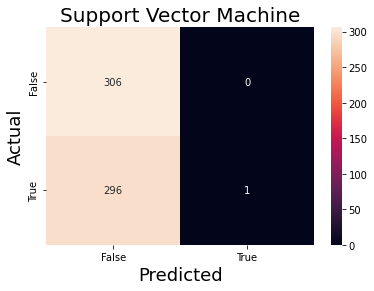

In [65]:
#Linear Support Vector Machine

churned_model_svc = LinearSVC(class_weight='balanced', random_state=0)
churned_model_svc = churned_model_svc.fit(X_train, y_train)

# Classify test data and display score and report
predicted_svc = churned_model_svc.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_svc)
print(f'Support Vector Machine Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_svc))

confusion(y_test, predicted_svc, ['False', 'True'], title='Support Vector Machine')

# Grab positive class probability
y_score_churned_model_svc = churned_model_svc.decision_function(X_test)

# Compute ROC curve and ROC area
fpr_churned_model_svc, tpr_churned_model_svc, thresholds = roc_curve(y_test, y_score_churned_model_svc)
roc_auc_churned_model_svc = auc(fpr_churned_model_svc, tpr_churned_model_svc)

Decision Tree Classifier [Churned Data] Score = 80.6%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       306
           1       0.81      0.79      0.80       297

    accuracy                           0.81       603
   macro avg       0.81      0.81      0.81       603
weighted avg       0.81      0.81      0.81       603



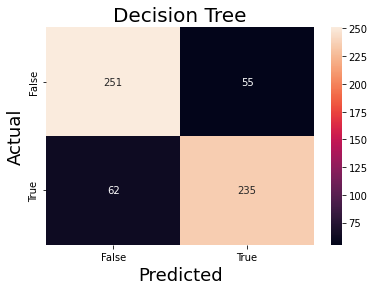

In [66]:
#Decision Tree
churned_model_dtc = DecisionTreeClassifier(random_state=0)
churned_model_dtc = churned_model_dtc.fit(X_train, y_train)


# Classify test data and display score and report
predicted_dtc = churned_model_dtc.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_dtc)
print(f'Decision Tree Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_dtc))

confusion(y_test, predicted_dtc, ['False', 'True'], title='Decision Tree')

# Grab positive class probability
y_score_churned_model_dtc = churned_model_dtc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_churned_model_dtc, tpr_churned_model_dtc, thresholds = roc_curve(y_test, y_score_churned_model_dtc)
roc_auc_churned_model_dtc = auc(fpr_churned_model_dtc, tpr_churned_model_dtc)

KNearest Neighbor Classifier [Churned Data] Score = 64.2%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       306
           1       0.70      0.48      0.57       297

    accuracy                           0.64       603
   macro avg       0.66      0.64      0.63       603
weighted avg       0.66      0.64      0.63       603



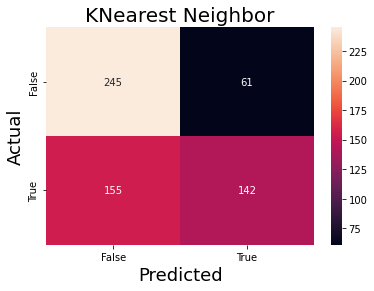

In [68]:
#KNN classifier
churned_model_knn = KNeighborsClassifier(n_neighbors = 5)
churned_model_knn = churned_model_knn.fit(X_train, y_train)

# Classify test data and display score and report
predicted_knn = churned_model_knn.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_knn)
print(f'KNearest Neighbor Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_knn))

confusion(y_test, predicted_knn, ['False', 'True'], title='KNearest Neighbor')

# Grab positive class probability
y_score_churned_model_knn = churned_model_knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_churned_model_knn, tpr_churned_model_knn, thresholds = roc_curve(y_test, y_score_churned_model_knn)
roc_auc_churned_model_knn = auc(fpr_churned_model_knn, tpr_churned_model_knn)

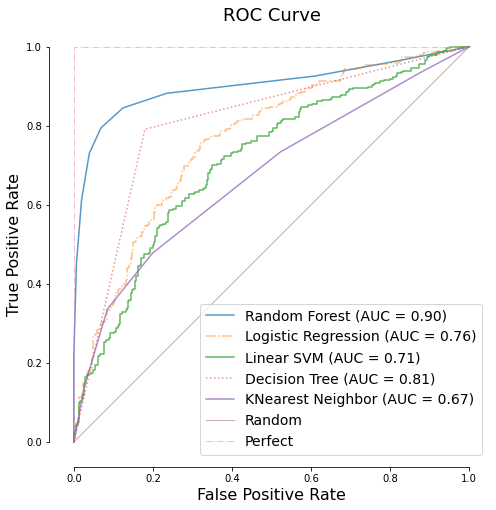

In [69]:
# Make the plots
fig, ax = plt.subplots(figsize=(8, 8))

# Plot data and model
ax.plot(fpr_churned_model_rf, tpr_churned_model_rf, alpha = 0.75, linestyle='-', 
        label=f'Random Forest (AUC = {roc_auc_churned_model_rf:4.2f})')

ax.plot(fpr_churned_model_lr, tpr_churned_model_lr, alpha = 0.5, linestyle='-.',
        label=f'Logistic Regression (AUC = {roc_auc_churned_model_lr:4.2f})')

ax.plot(fpr_churned_model_svc, tpr_churned_model_svc, alpha = 0.75, linestyle='-',
        label=f'Linear SVM (AUC = {roc_auc_churned_model_svc:4.2f})')

ax.plot(fpr_churned_model_dtc, tpr_churned_model_dtc, alpha = 0.5, linestyle=':',
        label=f'Decision Tree (AUC = {roc_auc_churned_model_dtc:4.2f})')
ax.plot(fpr_churned_model_knn, tpr_churned_model_knn, alpha = 0.75, linestyle= '-',
       label=f'KNearest Neighbor (AUC = {roc_auc_churned_model_knn:4.2f})')

ax.plot([0, 1], [0, 1], alpha = 0.5, lw=1, linestyle='-', label='Random')
ax.plot([0, 0, 1], [0, 1, 1], alpha = 0.5, lw=1, linestyle='-.', label='Perfect')

# Decorate plot appropriately
ax.set_title('ROC Curve', fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect('equal')
ax.legend(loc=4, fontsize=14)
sns.despine(offset=5, trim=True)

Logistic Regression [Churned Data] Score = 70.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       306
           1       0.70      0.68      0.69       297

    accuracy                           0.70       603
   macro avg       0.70      0.70      0.70       603
weighted avg       0.70      0.70      0.70       603

 


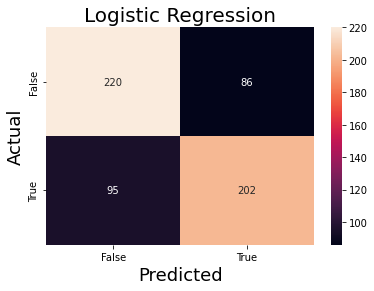

In [56]:
# Sampling class 0 to have near balanced class
balanced_class0 = df[df.target == 0].sample(n = 800)
balanced_class1 = df[df.target == 1].sample(n = 707)
new_df = pd.concat([balanced_class0, balanced_class1], ignore_index=True)


# Creating dependent and independent variable
new_X = new_df.drop(columns = ["target"])
new_y = new_df["target"]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=23)

churned_model_lr_new = LogisticRegression(C=1E6)
churned_model_lr_new = churned_model_lr_new.fit(X_train, y_train)

# Use model to predict test data
predicted_lr_new = churned_model_lr_new.predict(X_test)

# Model Evaluation
score = 100.0 * metrics.accuracy_score(y_test, predicted_lr_new)
print(f'Logistic Regression [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_lr_new))
print(" ")

# Confusion Matrix
confusion(y_test, predicted_lr_new, ['False', 'True'], title='Logistic Regression')

# Grab positive class probability
y_score_churned_model_lr_new = churned_model_lr_new.decision_function(X_test)

# Compute ROC curve and ROC area
fpr_churned_model_lr_new, tpr_churned_model_lr_new, thresholds = roc_curve(y_test, y_score_churned_model_lr_new)
roc_auc_churned_model_lr_new = auc(fpr_churned_model_lr_new, tpr_churned_model_lr_new)

Random Forest Classifier [Churned Data] Score = 86.2%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       306
           1       0.92      0.78      0.85       297

    accuracy                           0.86       603
   macro avg       0.87      0.86      0.86       603
weighted avg       0.87      0.86      0.86       603

 


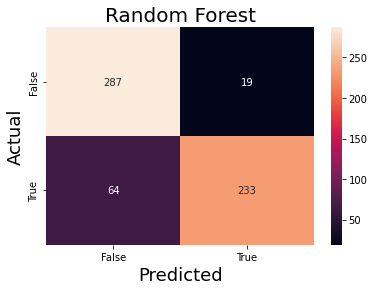

In [57]:
# Sampling class 0 to have near balanced class
balanced_class0 = df[df.target == 0].sample(n = 800)
balanced_class1 = df[df.target == 1].sample(n = 707)
new_df = pd.concat([balanced_class0, balanced_class1], ignore_index=True)

# Creating dependent and independent variable
new_X = new_df.drop(columns = ["target"])
new_y = new_df["target"]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=23)

# Create and fit classifier
churned_model_rf_new = RandomForestClassifier(n_estimators=10, random_state=0)
churned_model_rf_new = churned_model_rf_new.fit(X_train, y_train)

# Classify test data and display score and report
predicted_rf_new = churned_model_rf_new.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_rf_new)
print(f'Random Forest Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_rf_new))

print(" ")

confusion(y_test, predicted_rf_new, ['False', 'True'], title='Random Forest')

# Grab positive class probability
y_score_churned_model_rf_new = churned_model_rf_new.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_churned_model_rf_new, tpr_churned_model_rf_new, thresholds = roc_curve(y_test, y_score_churned_model_rf_new)
roc_auc_churned_model_rf_new = auc(fpr_churned_model_rf_new, tpr_churned_model_rf_new)

Support Vector Machine Classifier [Churned Data] Score = 53.2%

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       306
           1       0.94      0.05      0.10       297

    accuracy                           0.53       603
   macro avg       0.73      0.53      0.39       603
weighted avg       0.73      0.53      0.40       603

 


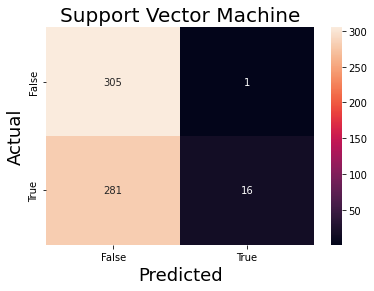

In [58]:
# Sampling class 0 to have near balanced class
balanced_class0 = df[df.target == 0].sample(n = 800)
balanced_class1 = df[df.target == 1].sample(n = 707)
new_df = pd.concat([balanced_class0, balanced_class1], ignore_index=True)

# Creating dependent and independent variable
new_X = new_df.drop(columns = ["target"])
new_y = new_df["target"]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=23)

#Linear Support Vector Machine
churned_model_svc_new = LinearSVC(class_weight='balanced', random_state=0)
churned_model_svc_new = churned_model_svc_new.fit(X_train, y_train)

# Classify test data and display score and report
predicted_svc_new = churned_model_svc_new.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_svc_new)
print(f'Support Vector Machine Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_svc_new))

print(" ")

confusion(y_test, predicted_svc_new, ['False', 'True'], title='Support Vector Machine')

# Grab positive class probability
y_score_churned_model_svc_new = churned_model_svc_new.decision_function(X_test)

# Compute ROC curve and ROC area
fpr_churned_model_svc_new, tpr_churned_model_svc_new, thresholds = roc_curve(y_test, y_score_churned_model_svc_new)
roc_auc_churned_model_svc_new = auc(fpr_churned_model_svc_new, tpr_churned_model_svc_new)

 
Decision Tree Classifier [Churned Data] Score = 80.9%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       306
           1       0.81      0.80      0.80       297

    accuracy                           0.81       603
   macro avg       0.81      0.81      0.81       603
weighted avg       0.81      0.81      0.81       603

 


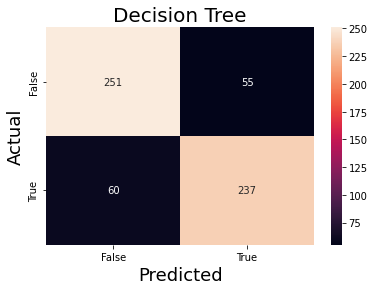

In [59]:
# Sampling class 0 to have near balanced class
balanced_class0 = df[df.target == 0].sample(n = 800)
balanced_class1 = df[df.target == 1].sample(n = 707)
new_df = pd.concat([balanced_class0, balanced_class1], ignore_index=True)

# Creating dependent and independent variable
new_X = new_df.drop(columns = ["target"])
new_y = new_df["target"]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=23)

#Decision Tree
churned_model_dtc_new = DecisionTreeClassifier(random_state=0)
churned_model_dtc_new = churned_model_dtc.fit(X_train, y_train)

print(" ")

# Classify test data and display score and report
predicted_dtc_new = churned_model_dtc_new.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_dtc_new)
print(f'Decision Tree Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_dtc_new))

print(" ")

confusion(y_test, predicted_dtc_new, ['False', 'True'], title='Decision Tree')

# Grab positive class probability
y_score_churned_model_dtc_new = churned_model_dtc_new.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_churned_model_dtc_new, tpr_churned_model_dtc_new, thresholds = roc_curve(y_test, y_score_churned_model_dtc_new)
roc_auc_churned_model_dtc_new = auc(fpr_churned_model_dtc_new, tpr_churned_model_dtc_new)

 
KNearest Neighbor Classifier [Churned Data] Score = 64.2%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       306
           1       0.70      0.48      0.57       297

    accuracy                           0.64       603
   macro avg       0.66      0.64      0.63       603
weighted avg       0.66      0.64      0.63       603

 


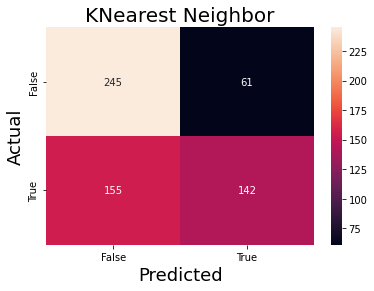

In [60]:
# Sampling class 0 to have near balanced class
balanced_class0 = df[df.target == 0].sample(n = 800)
balanced_class1 = df[df.target == 1].sample(n = 707)
new_df = pd.concat([balanced_class0, balanced_class1], ignore_index=True)


# Creating dependent and independent variable
new_X = new_df.drop(columns = ["target"])
new_y = new_df["target"]

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.4, random_state=23)

#KNN classifier
churned_model_knn_new = KNeighborsClassifier(n_neighbors = 5)
churned_model_knn_new = churned_model_knn.fit(X_train, y_train)

print(" ")

# Classify test data and display score and report
predicted_knn_new = churned_model_knn_new.predict(X_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted_knn_new)
print(f'KNearest Neighbor Classifier [Churned Data] Score = {score:4.1f}%\n')
print('Classification Report:')
print(metrics.classification_report(y_test, predicted_knn_new))

print(" ")

confusion(y_test, predicted_knn_new, ['False', 'True'], title='KNearest Neighbor')

# Grab positive class probability
y_score_churned_model_knn_new = churned_model_knn_new.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest Classifier
fpr_churned_model_knn_new, tpr_churned_model_knn_new, thresholds = roc_curve(y_test, y_score_churned_model_knn_new)
roc_auc_churned_model_knn_new = auc(fpr_churned_model_knn_new, tpr_churned_model_knn_new)

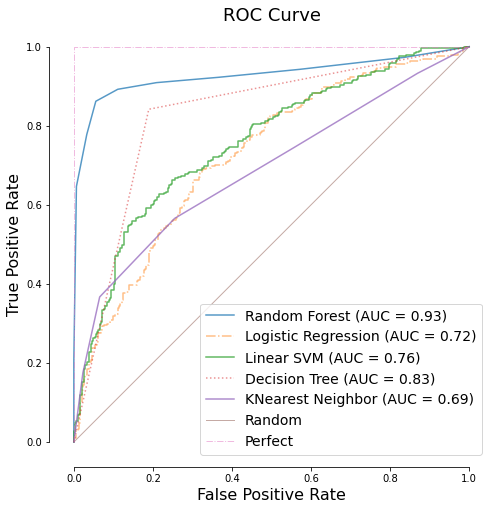

In [55]:
# Make the plots
fig, ax = plt.subplots(figsize=(8, 8))

# Plot data and model
ax.plot(fpr_churned_model_rf_new, tpr_churned_model_rf_new, alpha = 0.75, linestyle='-', 
        label=f'Random Forest (AUC = {roc_auc_churned_model_rf_new:4.2f})')

ax.plot(fpr_churned_model_lr_new, tpr_churned_model_lr_new, alpha = 0.5, linestyle='-.',
        label=f'Logistic Regression (AUC = {roc_auc_churned_model_lr_new:4.2f})')

ax.plot(fpr_churned_model_svc_new, tpr_churned_model_svc_new, alpha = 0.75, linestyle='-',
        label=f'Linear SVM (AUC = {roc_auc_churned_model_svc_new:4.2f})')

ax.plot(fpr_churned_model_dtc_new, tpr_churned_model_dtc_new, alpha = 0.5, linestyle=':',
        label=f'Decision Tree (AUC = {roc_auc_churned_model_dtc_new:4.2f})')
ax.plot(fpr_churned_model_knn_new, tpr_churned_model_knn_new, alpha = 0.75, linestyle= '-',
       label=f'KNearest Neighbor (AUC = {roc_auc_churned_model_knn_new:4.2f})')

ax.plot([0, 1], [0, 1], alpha = 0.5, lw=1, linestyle='-', label='Random')
ax.plot([0, 0, 1], [0, 1, 1], alpha = 0.5, lw=1, linestyle='-.', label='Perfect')

# Decorate plot appropriately
ax.set_title('ROC Curve', fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect('equal')
ax.legend(loc=4, fontsize=14)
sns.despine(offset=5, trim=True)